<a href="https://colab.research.google.com/github/maxinelanier/Seattle-Weather/blob/main/Copy_of_DATA_3320_Seattle_St_Louis_Data_Preparation_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Provide a brief introduction to the purpose of this notebook.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

I have already obtained the data. The data are available at this [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

Load the Seattle data set

In [ ]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

Load the St. Louis data set

In [ ]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

## Explore the contents of the data sets

In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


In [ ]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


## Convert data types, if necessary

In [ ]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [ ]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

## Select relevant subsets of the data

Get rid of extra stations from st. Louis data set.
Get rid of extra time period.
Logical indexing from the conditions we want.

In [ ]:
df_seattle.loc[:,'PRCP']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1653    0.78
1654    0.40
1655    0.03
1656    0.62
1657    0.17
Name: PRCP, Length: 1658, dtype: float64

In [ ]:
df_seattle[['STATION','DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


In [ ]:
df_seattle.loc[:,['STATION','DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


In [ ]:
df_seattle.iloc[:3]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
df_seattle[df_seattle['PRCP']>0]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
10,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-14,NaN,NaN,0.20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-27,NaN,NaN,0.78,NaN,NaN,NaN,NaN
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-28,NaN,NaN,0.40,NaN,NaN,NaN,NaN
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62,NaN,NaN,NaN,NaN


In [ ]:
df_seattle[df_seattle['PRCP'].between(0.5,0.75)]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
20,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-24,NaN,NaN,0.63,NaN,NaN,NaN,NaN
35,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-08,NaN,NaN,0.55,NaN,NaN,NaN,NaN
41,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-14,NaN,NaN,0.68,NaN,NaN,NaN,NaN
271,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-12-10,NaN,NaN,0.56,NaN,NaN,NaN,NaN
296,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-04,NaN,NaN,0.55,NaN,NaN,NaN,NaN
313,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-23,NaN,NaN,0.70,NaN,NaN,NaN,NaN
331,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-02-11,NaN,NaN,0.70,4.0,NaN,NaN,NaN
419,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-05-17,NaN,NaN,0.60,NaN,NaN,NaN,NaN
472,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-07-19,NaN,NaN,0.62,NaN,NaN,NaN,NaN


In [ ]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN


In [ ]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45775 entries, 241 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  45775 non-null  object 
 1   NAME     45775 non-null  object 
 2   DATE     45775 non-null  object 
 3   DAPR     1045 non-null   float64
 4   MDPR     1042 non-null   float64
 5   PRCP     44514 non-null  float64
 6   SNOW     27919 non-null  float64
 7   SNWD     10994 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.1+ MB


## Identify and deal with missing values

In [ ]:
df_stlouis.isna().sum()

STATION        0
NAME           0
DATE           0
DAPR       44730
MDPR       44733
PRCP        1261
SNOW       17856
SNWD       34781
dtype: int64

In [ ]:
df_seattle.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1635
MDPR       1635
PRCP         22
SNOW       1305
SNWD       1592
WESD       1643
WESF       1630
dtype: int64

<Axes: >

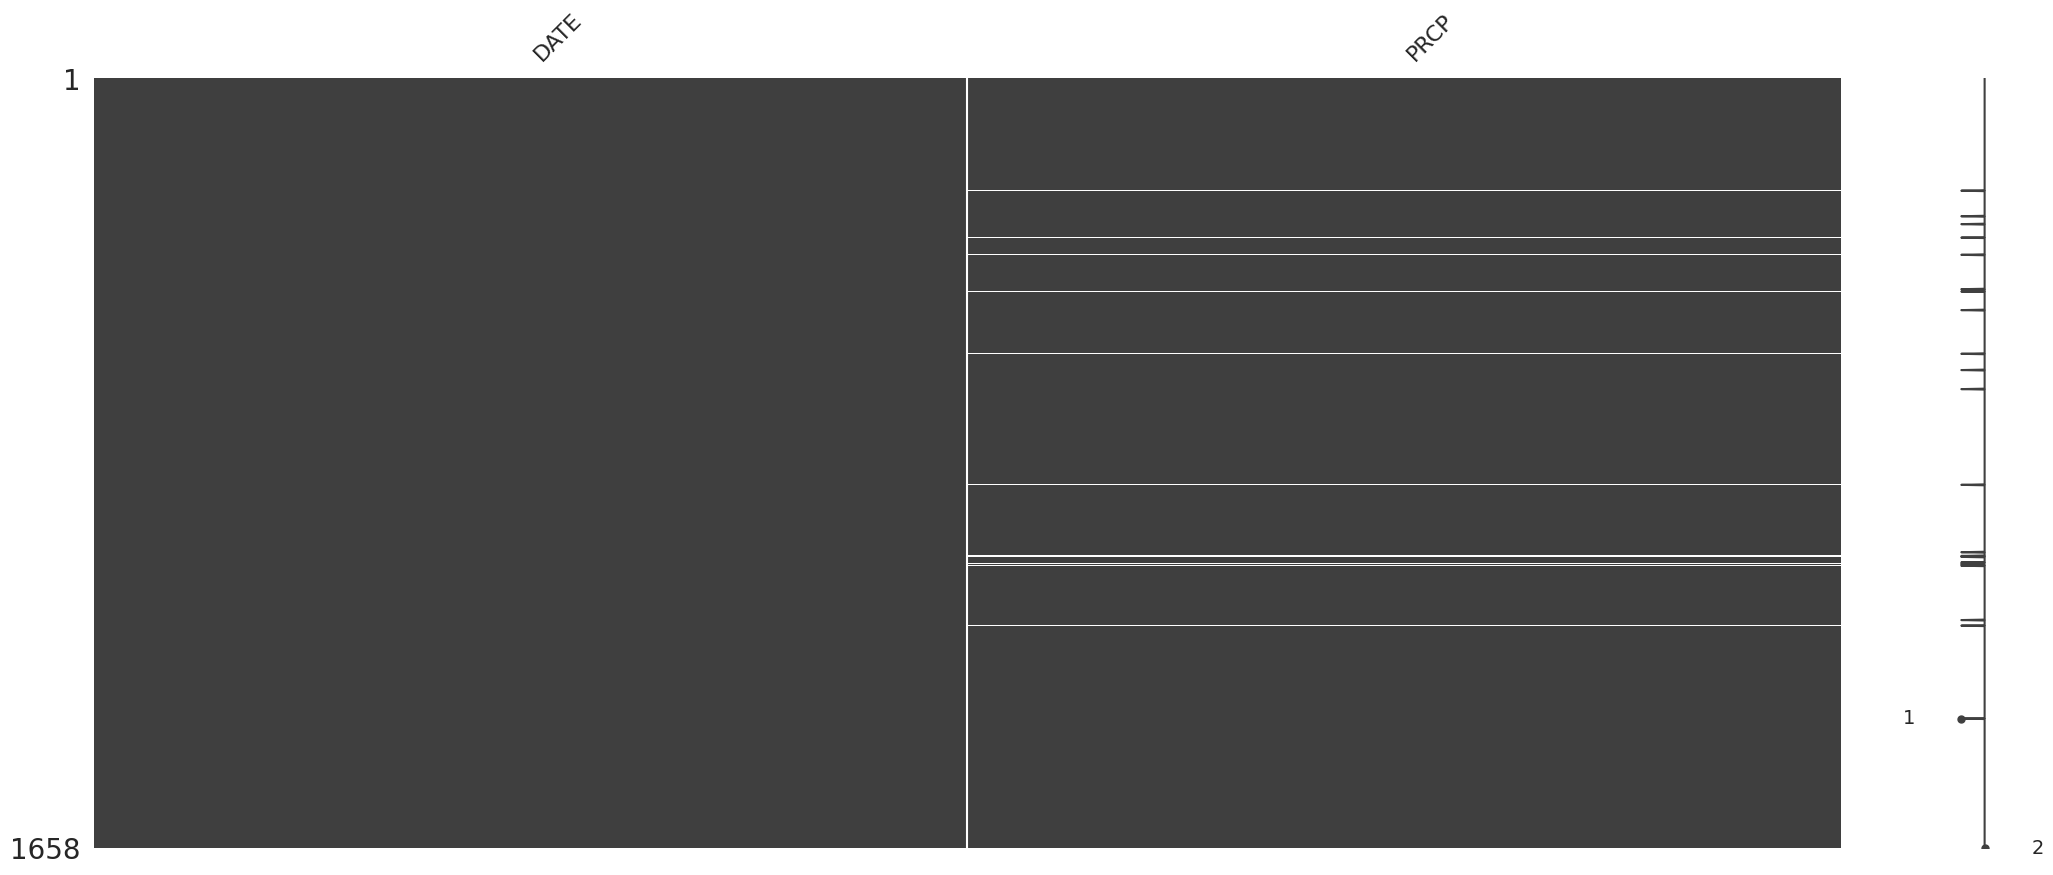

In [ ]:
msno.matrix(df_seattle[['DATE','PRCP']])

## Join data frames keeping `DATE` and `PRCP` columns

## Create a tidy data frame with columns for city and precipitation

### Rename columns or values to follow best practices

## Create relevant derived variables as new columns

We may already know that we want to process the data to create new variables from the existing variables. However, we often start analyzing the data and realize that it is useful to create new variables derived from the existing variables. It is fine to return to modify this step after exploring the data further.

## Export the clean .csv file